<a href="https://colab.research.google.com/github/patelhiren3385/CNNs/blob/master/PyTorch_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outline


*   CIFAR10 Dataset
*   LeNet training 



In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Data Loading

In [ ]:
import torchvision
import torchvision.transforms as transforms

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,download = True, transform=transforms.ToTensor())

Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True)

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(images[1].shape)
print(labels[1].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
8


# Visualise the Data

In [ ]:
img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [ ]:
def imshow(img):
  npimg = img.numpy()
  plt.figure(figsize=(1,1))
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

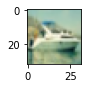

In [ ]:
imshow(img)

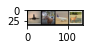

plane horse plane deer


In [ ]:
grid = imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))
plt.show()

# Single Convolution Layer

In [ ]:
import torch.nn as nn

class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN,self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3,out_channels=16,kernel_size=3,padding=(1,1),stride=(1,1))

  def forward(self,X):
    X = self.conv1(X)
    return X
    

In [ ]:
net = FirstCNN()

In [ ]:
out = net(images)
out.shape

torch.Size([4, 16, 32, 32])

In [ ]:
for params in net.parameters():
  print(params.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [ ]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(32, 32)


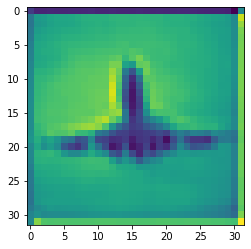

In [ ]:
plt.imshow(out[0,0,:,:].detach().numpy())
plt.show()

# Deep Convolution Network

In [ ]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet,self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=2),
        nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2,stride=2)
    )
    self.fc_model = nn.Sequential(
        nn.Linear(400,120),
        nn.Tanh(),
        nn.Linear(120,84),
        nn.Tanh(),
        nn.Linear(84,10)
    )
  def forward(self,X):
    # print(X.shape)
    X = self.cnn_model(X)
    # print(X.shape)
    X = X.view(X.size(0),-1)
    # print(X.shape)
    X = self.fc_model(X)
    # print(X.shape)
    return X


In [ ]:
net = LeNet()
out = net(images)

In [ ]:
print(out)

tensor([[-0.1143,  0.0016,  0.0676,  0.1200,  0.0291,  0.0883,  0.0775,  0.1044,
          0.0065, -0.0334],
        [-0.1214, -0.0014,  0.0687,  0.1313,  0.0287,  0.0937,  0.0676,  0.1008,
          0.0016, -0.0223],
        [-0.1301,  0.0150,  0.0665,  0.1410,  0.0264,  0.0952,  0.0740,  0.1206,
          0.0117, -0.0519],
        [-0.1176, -0.0022,  0.0798,  0.1370,  0.0417,  0.0943,  0.0651,  0.1096,
         -0.0113, -0.0607]], grad_fn=<AddmmBackward>)


In [ ]:
max_value, pred_class = torch.max(out.data,1)
print(max_value,pred_class)

tensor([0.1200, 0.1313, 0.1410, 0.1370]) tensor([3, 3, 3, 3])


# Training LeNet

In [ ]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,transform=transforms.ToTensor(),download=True)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=128,shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data',train=False,transform=transforms.ToTensor(),download=True)
testloader = torch.utils.data.DataLoader(dataset=testset,batch_size=batch_size,shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
def evaluation(dataloader):
  total, correct = 0, 0
  for data in dataloader:
    inputs, labels = data
    outputs = net(inputs)
    _, pred = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100*correct/total

In [ ]:
net = LeNet()

In [ ]:
import torch.optim as optim
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/10, Test acc: 39.09, Train acc: 39.09
Epoch: 1/10, Test acc: 43.25, Train acc: 44.15
Epoch: 2/10, Test acc: 46.67, Train acc: 47.61
Epoch: 3/10, Test acc: 49.69, Train acc: 51.09
Epoch: 4/10, Test acc: 50.96, Train acc: 53.21
Epoch: 5/10, Test acc: 51.61, Train acc: 54.66
Epoch: 6/10, Test acc: 51.94, Train acc: 56.18
Epoch: 7/10, Test acc: 53.71, Train acc: 58.16
Epoch: 8/10, Test acc: 53.94, Train acc: 59.70
Epoch: 9/10, Test acc: 54.45, Train acc: 61.03


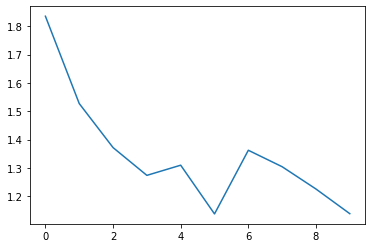

CPU times: user 3min 47s, sys: 2.81 s, total: 3min 50s
Wall time: 3min 50s


In [ ]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 10

for epoch in range(max_epochs):
  for i, data in enumerate(trainloader,0):
    inputs, labels = data

    opt.zero_grad()

    outputs = net(inputs)
    loss = loss_fn(outputs,labels)
    loss.backward()
    opt.step()
    loss_arr.append(loss.item())
  loss_epoch_arr.append(loss.item())

  print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' %(epoch,max_epochs,evaluation(testloader), evaluation(trainloader)))

plt.plot(loss_epoch_arr)
plt.show()

# Moving to GPUs

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
def evaluation(dataloader):
  total, correct = 0,0
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _,pred = torch.max(outputs.data, 1 )
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100*correct/total


In [ ]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [ ]:
%%time
max_epochs=  10

for epoch in range(max_epochs):
  for i, data in enumerate(trainloader,0):

    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    opt.zero_grad()

    outputs = net(inputs)
    loss = loss_fn(outputs,labels)
    loss.backward()
    opt.step()

  print('Epoch: %d/%d'%(epoch, max_epochs))

Epoch: 0/10
Epoch: 1/10
Epoch: 2/10
Epoch: 3/10
Epoch: 4/10
Epoch: 5/10
Epoch: 6/10
Epoch: 7/10
Epoch: 8/10
Epoch: 9/10
CPU times: user 52.3 s, sys: 387 ms, total: 52.7 s
Wall time: 52.9 s


In [ ]:
print('Tesr acc: %0.2f , Train acc: %0.2f'%(evaluation(testloader),evaluation(trainloader)))

Tesr acc: 54.15 , Train acc: 60.51


# Basic Visualization

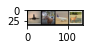

In [ ]:
yy = imshow(torchvision.utils.make_grid(images))



In [ ]:
net = net.to('cpu')

In [ ]:
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

<Figure size 720x720 with 0 Axes>

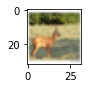

In [ ]:
imag_id = 3
plt.figure(figsize=(10,10))
imshow(images[imag_id,])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


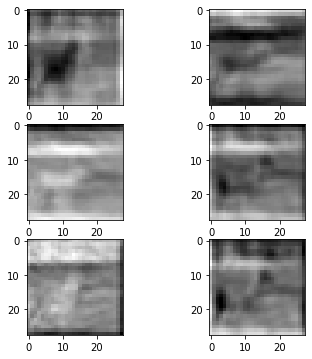

In [ ]:
plt.figure(figsize=(6,6))
plt.subplot(321)
for i in range(6):
  ax = plt.subplot(3,2,i+1)
  plt.imshow(out[imag_id,i,:,:].detach().numpy(),cmap = 'binary')
plt.show()

# PyTorch - Large CNNs
1. VGG-16 with modified network head
2. Using Pretrained models
3. ResNet
4. INception V3




In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available else 'cpu')
print(device)

cuda:0


# Steps to Train existing model for new dataset
PreProcessing the Data :
1. Transform the Input images
2. Create Train and Test datasets
3. Trainloader for iterate through data

Loading the training Model :
1. Load Pre trained model - VGG,ResNet,...
2. Print the model - to see whats Inside
3. Write Evaluation function
4. Writing the training loop


In [ ]:
transform_train = torchvision.transforms.Compose([
                                                  transforms.RandomResizedCrop(224),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean=(0.5,0.5,0.5),std=(0.5,0.5,0.5))])

transform_test = torchvision.transforms.Compose([
                                                 transforms.RandomResizedCrop(224),
                                                 transforms.ToTensor(),
                                                 transforms.Normalize(mean=(0.5,0.5,0.5),std=(0.5,0.5,0.5))
])

In [ ]:
trainset = torchvision.datasets.CIFAR10(root = './data', train = True, transform=transform_train,download=True)
testset = torchvision.datasets.CIFAR10(root = './data', train = False, transform=transform_test,download=True)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
num_classes = 10
batch_size = 4
trainloader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [ ]:
mean, std = 0.5,0.5
def imshow(img, title):
  npimg = std*img.numpy() + mean
  plt.figure(figsize=(batch_size,1))
  plt.axis('off')
  plt.imshow(np.transpose(npimg,axes=(1,2,0)))
  plt.title(title)
  plt.show()
def show_batch_images(dataloader):
  images, labels = next(iter(dataloader))
  img = torchvision.utils.make_grid(images)

  imshow(img, title = [str(img_label.item()) for img_label in labels])


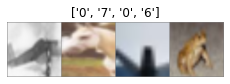

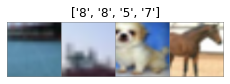

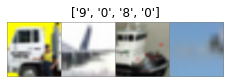

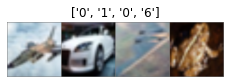

In [ ]:
for i in range(batch_size):
  show_batch_images(dataloader=trainloader)

# Stage 2 :: Loading the pre trained model

In [ ]:
from torchvision import models

In [ ]:
vgg = models.vgg16_bn()

In [ ]:
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [ ]:
print(vgg.classifier[6])

Linear(in_features=4096, out_features=1000, bias=True)


# Steps to modify layer in Pre loaed model
1. Access the layer and save the input channels.
2. Delet the perticular layer.
3. Add the layer by using extend command.
4. Add the classifier model to main MODEL.

In [ ]:
final_in_feature = vgg.classifier[6].in_features # Accessing total number of input features in last layer
mod_classifier = list(vgg.classifier.children())[:-1] # Deleting the last layer of classifier
mod_classifier.extend([nn.Linear(final_in_feature, num_classes)]) # Adding the last layer with 10 output class
print(mod_classifier)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=10, bias=True)]


In [ ]:
vgg.classifier = nn.Sequential(*mod_classifier)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

# Steps to Train the pre loaded model
1. Write Evaluation function: predict the model output and compare with labels.
2. Define : loss function and Algorithmto be used 
3. Training the model by iterating through data: set it to zero grad, calculate output -> loss -> Backpropagate the loss -> step to update the weights.

In [ ]:
batch_size = 16
trainloader = torch.utils.data.DataLoader(trainset,batch_size,shuffle=True)
testloader = torch.utils.data.DataLoader(testset,batch_size,shuffle=False)

In [ ]:
for data in testloader:
  inputs, labels = data

In [ ]:
print(inputs.shape,labels.size(0))

torch.Size([16, 3, 224, 224]) 16


In [ ]:
vgg = vgg.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(vgg.parameters(),lr = 0.05)

In [ ]:
def evaluation(dataloader, model):
  total, correct = 0,0
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    _, pred = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()

  return 100* correct/total

In [ ]:
import copy

In [ ]:
loss_epoch_arr = []
max_epoch = 1

min_loss = 1000
n_iters = np.ceil(50000/batch_size)


for epoch in range(max_epoch):
  for i, data in enumerate(trainloader,0):

    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    opt.zero_grad()

    outputs = vgg(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()

    if min_loss > loss.item():
      min_loss = loss.item()
      best_model = copy.deepcopy(vgg.state_dict())
      print('Min Loss: %0.2f' % min_loss)

    del inputs, labels, outputs
    torch.cuda.empty_cache()

    if i % 100 == 0:
      print('Iteration: %d/%d, Loss: %0.2f'%(i, n_iters, loss.item()))

  loss_epoch_err.append(loss.item())

  print('Epoch: %d/%d, Test: %0.2f , Train: %0.2f'%(epoch,max_epoch,evaluation(testloader,vgg),evaluation(trainloader,vgg)))

plt.plot(loss_epoch_arr)
plt.show()


Iteration: 0/3125, Loss: 2.23
Iteration: 100/3125, Loss: 2.33
Iteration: 200/3125, Loss: 2.20
Iteration: 300/3125, Loss: 2.20
Iteration: 400/3125, Loss: 2.17
Iteration: 500/3125, Loss: 2.27
Iteration: 600/3125, Loss: 2.16
Iteration: 700/3125, Loss: 2.13
Iteration: 800/3125, Loss: 1.93
Iteration: 900/3125, Loss: 2.14
Iteration: 1000/3125, Loss: 2.03
Iteration: 1100/3125, Loss: 2.42
Iteration: 1200/3125, Loss: 2.14
Iteration: 1300/3125, Loss: 1.91


KeyboardInterrupt: ignored

In [ ]:
vgg.load_state_dict(best_model)
print(evaluation(trainloader,vgg), evaluation(testloader,vgg))